# 데이터 불러오기

In [1]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz",
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True)

#### 각 리뷰에 해당하는 라벨값을 가져오는 함수

In [3]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

#### 각 파일에서 리뷰 텍스트를 불러오는 함수

In [4]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [6]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [7]:
reviews = list(train_df['review'])

In [8]:
reviews[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

# 데이터 분석

#### 문자열 문장 리스트를 토크나이즈

In [9]:
tokenized_reviews = [r.split() for r in reviews]

In [10]:
tokenized_reviews[0][:5]

['Bromwell', 'High', 'is', 'a', 'cartoon']

#### 토크나이즈 된 리스트에 대한 각 길이를 저장

In [11]:
review_len_by_token = [len(t) for t in tokenized_reviews]

In [12]:
review_len_by_token[:5]

[140, 428, 147, 124, 120]

#### 토크나이즈 된 것을 붙여서 음절의 길이를 저장

In [13]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

In [14]:
review_len_by_eumjeol[:5]

[667, 1939, 695, 540, 528]

Text(0, 0.5, 'Number of Reviews')

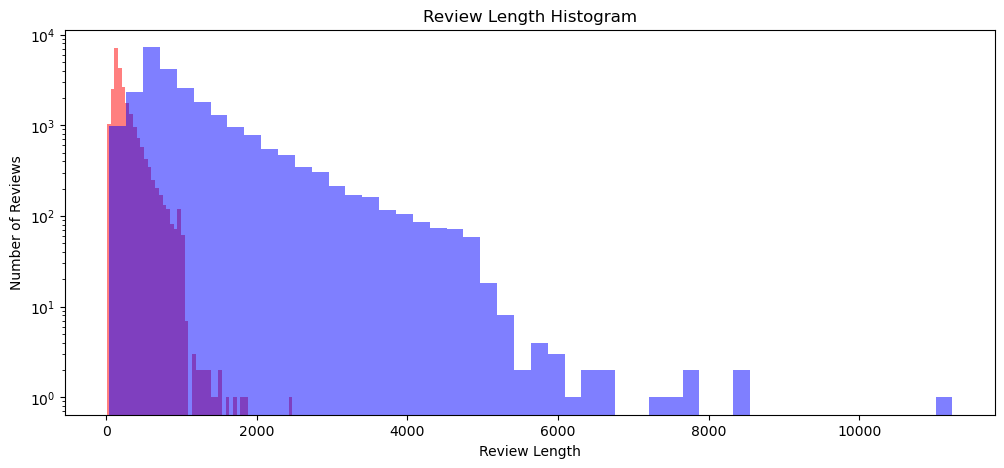

In [15]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')  # 그래프 제목
plt.xlabel('Review Length')           # 그래프 x 축 라벨
plt.ylabel('Number of Reviews')       # 그래프 y 축 라벨

In [16]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0 ~ 100 스케일로 되어있음
print('제 1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x17ca75c6850>,
 'caps': [<matplotlib.lines.Line2D at 0x17ca75d80d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ca7431450>],
 'medians': [<matplotlib.lines.Line2D at 0x17ca75d95d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ca75dab10>],
 'means': [<matplotlib.lines.Line2D at 0x17ca7406a90>]}

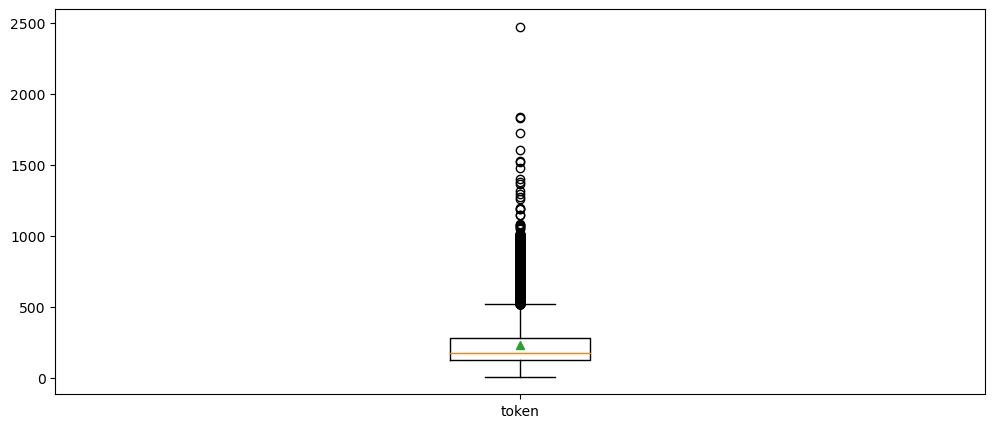

In [17]:
plt.figure(figsize=(12, 5))

# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함
plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x17ca7803010>,
 'caps': [<matplotlib.lines.Line2D at 0x17ca7560d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ca7542810>],
 'medians': [<matplotlib.lines.Line2D at 0x17ca7588e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ca780a9d0>],
 'means': [<matplotlib.lines.Line2D at 0x17ca7809e50>]}

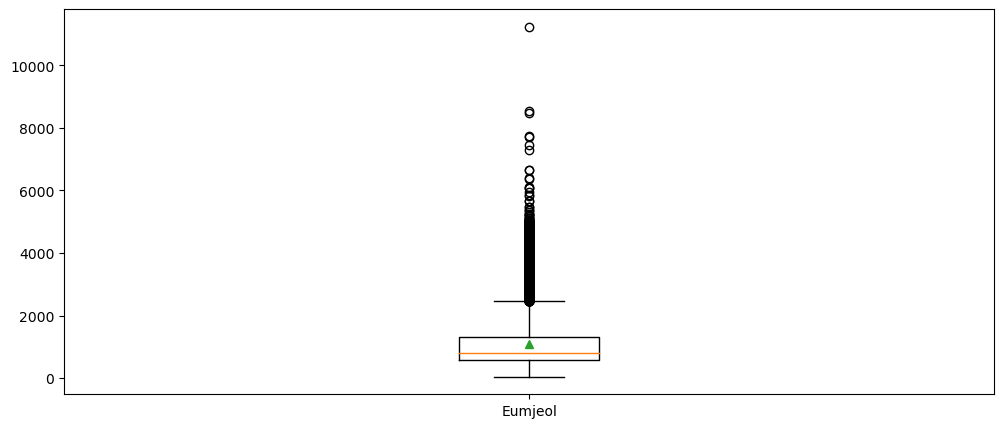

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
            labels=['Eumjeol'],
            showmeans=True)

# 워드 클라우드

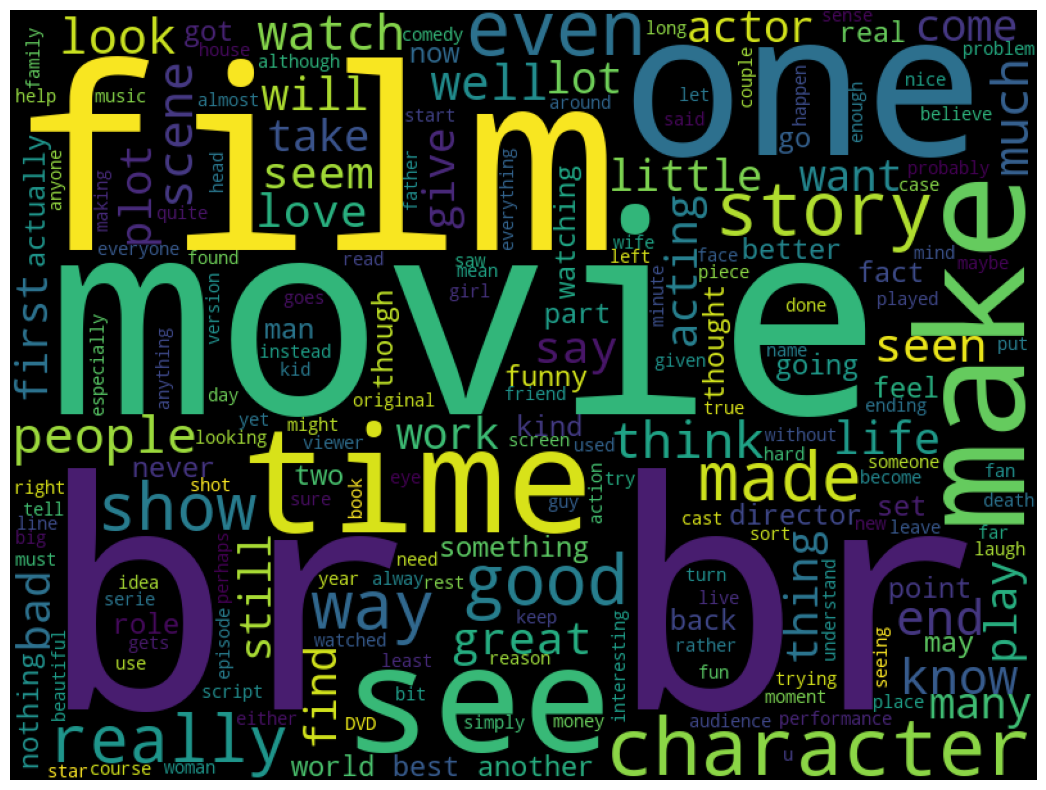

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 긍정 부정 분포

<Axes: xlabel='sentiment', ylabel='count'>

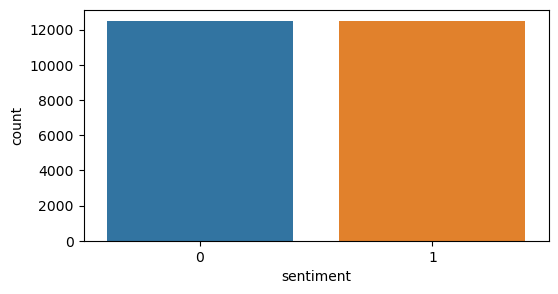

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(data=train_df, x='sentiment')